In [142]:
import sqlite3

In [143]:
%reload_ext sql

In [144]:
import matplotlib.pyplot as plt

In [145]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
%sql sqlite:///music_smaller_10000_jia.db

In [148]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///music_smaller_10000_jia.db
Done.


name
slice_time
playlists
song


In [149]:
%%sql

SELECT *
FROM song
LIMIT 5

 * sqlite:///music_smaller_10000_jia.db
Done.


track_uri,pid,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
spotify:track:4SDywo3ykB2PEthjXvo1UP,6,0,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,I Put A Spell On You,spotify:album:7oIftk0P8cViwNpNEdCYl2,271786,Creedence Clearwater Revival
spotify:track:229SqGbacrLSBfb9XfJczF,6,1,STRFKR,spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU,Bury Us Alive,spotify:album:5pfqk4oFycMVynOD8S2Cqs,190360,Reptilians
spotify:track:0orNm6qQT2B5WFi0l7l3PV,6,2,311,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,Jackolantern's Weather,spotify:album:6VIeIM5tetuv7FrYxISffU,204160,311
spotify:track:1hWQvA6oGVJ2mAVsZ59AaV,6,3,Nathaniel Rateliff & The Night Sweats,spotify:artist:02seUFsFQP7TH4hLrTj77o,S.O.B.,spotify:album:2UCyiayMoJOwBilPLQPQvK,247612,Nathaniel Rateliff & The Night Sweats
spotify:track:56SkdBKyR2zOkjk6wVFI9s,6,4,Toadies,spotify:artist:2QMMktUMtwMSwUZATX1cRO,Possum Kingdom,spotify:album:7tFTqVGHceSlXOaz8IylBN,309573,Rubberneck


In [150]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [151]:
connection.close()

In [152]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('music_smaller_10000_jia.db')

query = "SELECT * FROM song"
datos = pd.read_sql_query(query, connection)

print(datos.head())

connection.close()

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:229SqGbacrLSBfb9XfJczF    6    1   
2  spotify:track:0orNm6qQT2B5WFi0l7l3PV    6    2   
3  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
4  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   

                             artist_name  \
0           Creedence Clearwater Revival   
1                                 STRFKR   
2                                    311   
3  Nathaniel Rateliff & The Night Sweats   
4                                Toadies   

                              artist_uri              track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd    I Put A Spell On You   
1  spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU           Bury Us Alive   
2  spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K  Jackolantern's Weather   
3  spotify:artist:02seUFsFQP7TH4hLrTj77o                  S.O.B.   
4  spotify:artist:2QMMktUMtwMSwUZATX1cRO          Possum Kingdom   

       

In [153]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///music_smaller_10000_jia.db
Done.


name
slice_time
playlists
song


# De aquí para abajo estan los gráficos y lo de la entrega de verdad.
# En esta entrega intenté construir todos los gráficos en relación con la pregunta de
# ¿Existe una relación entre la longitud de las canciones y playlists, y la popularidad de los artistas?

In [154]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('music_smaller_10000_jia.db')

query = "SELECT * FROM song"
datos = pd.read_sql_query(query, connection)

print(datos.head())

connection.close()

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:229SqGbacrLSBfb9XfJczF    6    1   
2  spotify:track:0orNm6qQT2B5WFi0l7l3PV    6    2   
3  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
4  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   

                             artist_name  \
0           Creedence Clearwater Revival   
1                                 STRFKR   
2                                    311   
3  Nathaniel Rateliff & The Night Sweats   
4                                Toadies   

                              artist_uri              track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd    I Put A Spell On You   
1  spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU           Bury Us Alive   
2  spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K  Jackolantern's Weather   
3  spotify:artist:02seUFsFQP7TH4hLrTj77o                  S.O.B.   
4  spotify:artist:2QMMktUMtwMSwUZATX1cRO          Possum Kingdom   

       

# Con el siguiente gráfico pretendía mostrar los diez artistas que más veces aparecen en las playlists
# de Spotify, para lo cual encontre el promedio de veces que aparecía cada artista
# y luego las organice usando un gráfico estilo categorico. 
# Lo que este gráfico revela es a los diez artistas con más canciones en Playlists.
# Esto ayuda a responder la pregunta de investigación debido a que revela cuales son los artistas
# con las canciones que los miembros de Spotify eligen seleccionar para sus playlists.

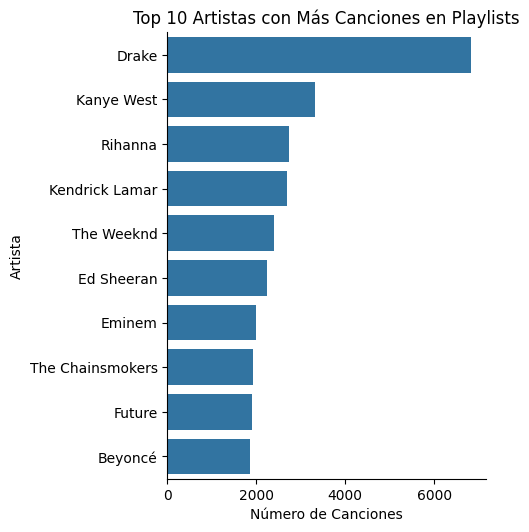

In [155]:
artist_song_count = music_smaller_10000_jia['artist_name'].value_counts().head(10)
sns.catplot(x=artist_song_count.values, y=artist_song_count.index, kind='bar')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.title('Top 10 Artistas con Más Canciones en Playlists')
plt.show()

# Con el siguiente gráfico pretendía mostrar dentro de los diez artistas,
# en qué posición aparecen sus canciones en las playlists.
# Para lo cual encontre el promedio de la posición de cada canción en cada playlist
# y luego las organice usando un gráfico estilo caja y bigotes.
# Lo que esto revelo es que la media de las canciones de estos artistas se encuentra entre las 
# primeras 50 canciones de cada playlists,
# indicando que las personas que hacen las playlists piensan en la música de estos artistas 
# de primer lugar al formar las playlists.

In [156]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('music_smaller_10000_jia.db')

query = "SELECT * FROM song"
datos = pd.read_sql_query(query, connection)

connection.close()

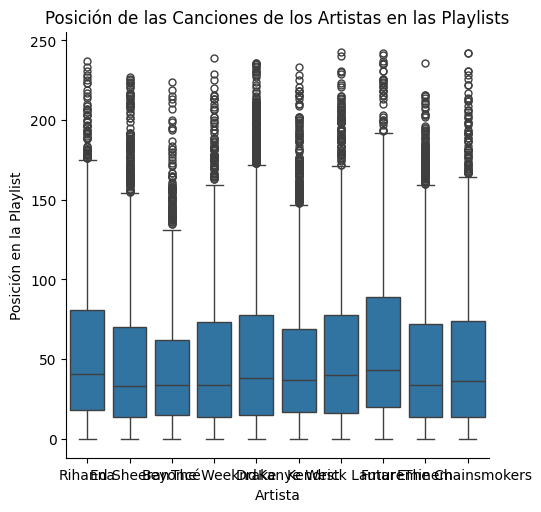

In [157]:
top_artists = music_smaller_10000_jia['artist_name'].value_counts().head(10).index
top_artists_data = music_smaller_10000_jia[music_smaller_10000_jia['artist_name'].isin(top_artists)]

sns.catplot(data=top_artists_data, x='artist_name', y='pos',kind='box')
plt.xlabel('Artista')
plt.ylabel('Posición en la Playlist')
plt.title('Posición de las Canciones de los Artistas en las Playlists')
plt.show()

# En el siguiente gráfico busco evidenciar el promedio de artistas con canciones más largas,
# esto lo hice a traves de encontrar el promedio de longitud de las canciones y luego organizar a los 
# artistas por su promedio de longitud de canciones.

In [158]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('music_smaller_10000_jia.db')

query = "SELECT * FROM song"
datos = pd.read_sql_query(query, connection)

connection.close()

c:\Users\juani\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


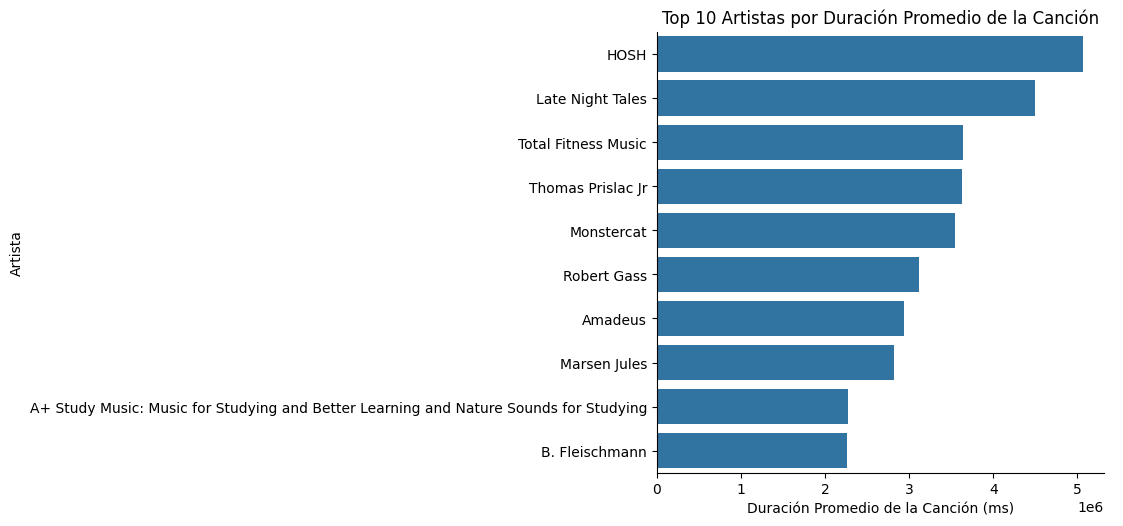

In [159]:
artist_duration = music_smaller_10000_jia.groupby('artist_name')['duration_ms'].mean().sort_values(ascending=False).head(10)

sns.catplot(x=artist_duration.values, y=artist_duration.index, kind='bar')
plt.xlabel('Duración Promedio de la Canción (ms)')
plt.ylabel('Artista')
plt.title('Top 10 Artistas por Duración Promedio de la Canción')
plt.show()

In [160]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('music_smaller_10000_jia.db')

query = "SELECT * FROM song"
datos = pd.read_sql_query(query, connection)

connection.close()


# En el siguiente gráfico buscaba analizar la posición de las canciones y si tenía alguna correlación con su
# posicionamiento en las playlists, a traves de lo cual se puede evidenciar que las canciones más largas suelen
# ocupar lugares entre las primeras 50 canciones de las playlists.

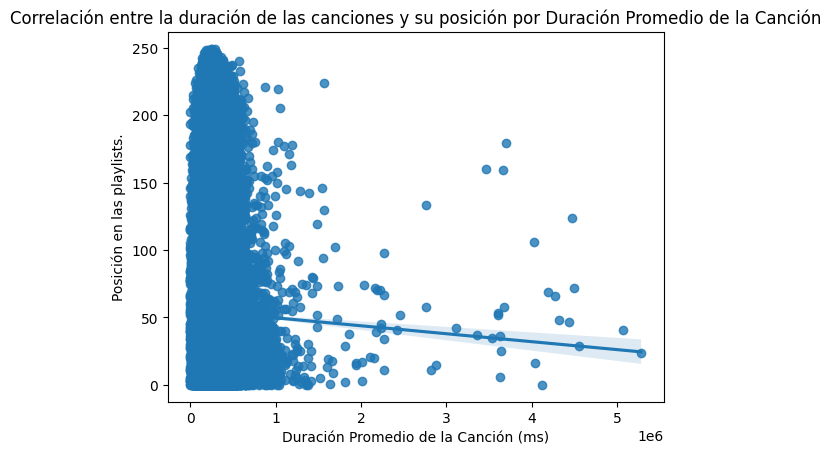

In [161]:
sns.regplot(x="duration_ms", y="pos", data=music_smaller_10000_jia);
plt.xlabel('Duración Promedio de la Canción (ms)')
plt.ylabel('Posición en las playlists.')
plt.title('Correlación entre la duración de las canciones y su posición por Duración Promedio de la Canción')
plt.show()

# En el siguiente gráfico tengo la intención de evidenciar un heatmap que permita entender las relaciones
# entre las variables de las Playlists, para poder identificar la relación entre la longitud
# de las playlists, la longitud de las canciones, y la importancia de los artistas.


In [162]:
connection = sqlite3.connect('music_smaller_10000_jia.db')

query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, connection)

connection.close()

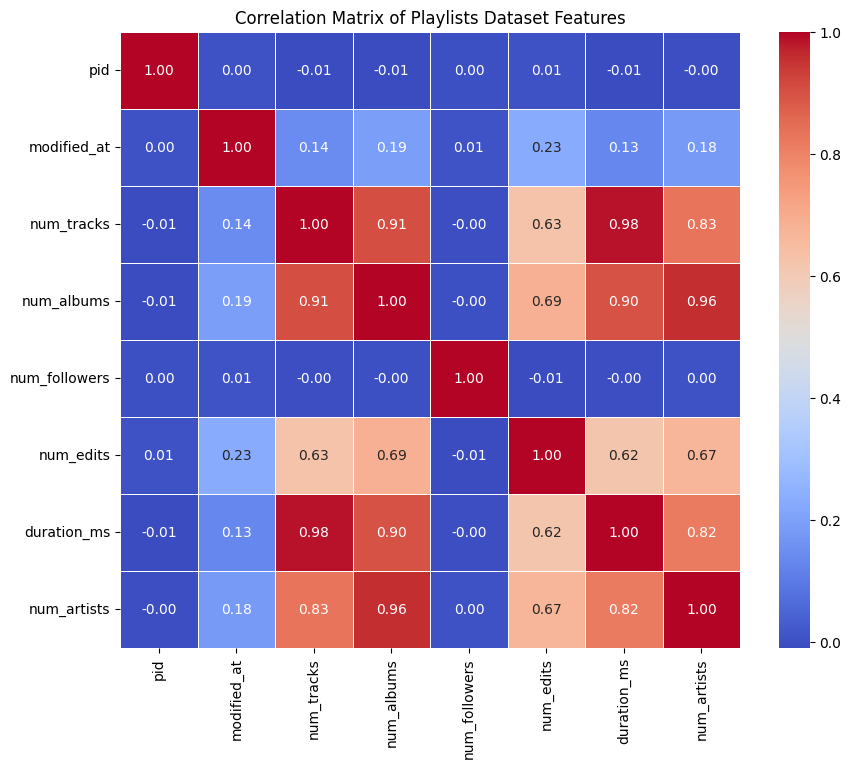

In [163]:
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[float, int])

corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Playlists Dataset Features')
plt.show()


# Parrafo respondiendo a la pregunta de investigación:
# Es claro evidenciar que no hay una correlación entre los artistas más populares y las canciones más largas.
# Por un lado, se puede ver que los artistas que son los más populares no coinciden en ningún sentido con
# los artistas que tienen las canciones más largas, y tampoco se puede ver que haya alguna relación
# entre las playlists más largas y la cantidad de seguidores que tienen, como se puede ver en el heatmap.
